In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Read dataset

In [2]:
Airlines_Data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
Airlines_Data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### EDA

In [3]:
# Drop ID column.
Airlines_Data.drop('ID#', axis=1, inplace=True)
Airlines_Data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [4]:
# Rename Awards? column.
Airlines_Data.rename(columns={'Award?' : 'Award'}, inplace=True)
Airlines_Data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [5]:
Airlines_Data.shape

(3999, 11)

In [6]:
Airlines_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
Airlines_Data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
Airlines_Data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [9]:
# Checking duplicates.
Airlines_Data[Airlines_Data.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3370,1000,0,1,1,1,0,0,0,0,1597,0
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
# Drop duplicate
Airlines_Data.drop_duplicates(keep='first', inplace=True)

In [11]:
# Reset index
Airlines_Data.reset_index(drop=True, inplace=True)
Airlines_Data[3873:3878]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3873,24475,0,1,1,1,800,8,800,8,1614,0
3874,25753,0,1,1,1,3400,21,0,0,1614,0
3875,70659,0,2,1,1,9178,8,0,0,1622,0
3876,63162,0,3,1,1,27564,8,0,0,1600,1
3877,17472,0,1,1,1,500,1,0,0,1618,0


In [12]:
Airlines_Data.shape

(3998, 11)

### Use standardization on data

In [13]:
# neccessory libraries
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [14]:
# Apply standardization.
df1 = Scaler.fit_transform(Airlines_Data)
pd.DataFrame(df1)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659
3995,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072


In [15]:
Airlines_Data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [16]:
std_data = pd.DataFrame(columns= {'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'},data=df1)
std_data.head()

,Flight_miles_12mo,Days_since_enroll,Bonus_trans,Balance,Flight_trans_12,Award,cc2_miles,Qual_miles,cc1_miles,Bonus_miles,cc3_miles
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659


### 1) Hierarchical Clustering (Agglomerative Clustering)

In [17]:
# Neccessory libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'Distance')

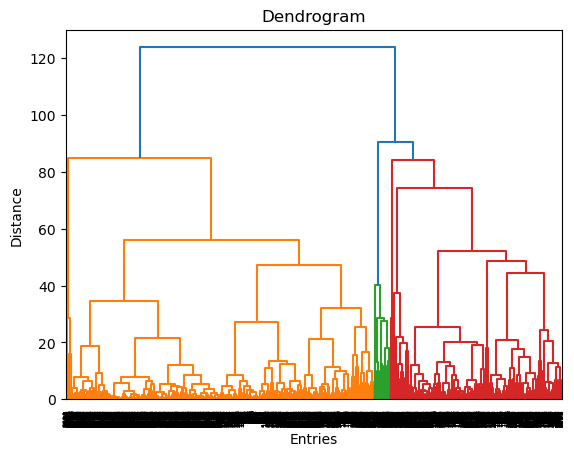

In [42]:
# Plot dendrogram
Dendrogram = sch.dendrogram(sch.linkage(std_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Entries')
plt.ylabel('Distance')

In [19]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
hc.fit_predict(std_data)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [20]:
# Create new variable for hierarchical clustering to store clusters.
Airlines_Data_HC = Airlines_Data

In [21]:
# storing clusters in new variable.
Airlines_Data_HC['Clusters'] = hc.labels_
Airlines_Data_HC

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,1
3994,64385,0,1,1,1,981,5,0,0,1395,1,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1,1
3996,54899,0,1,1,1,500,1,500,1,1401,0,1


In [22]:
# Unique clusters.
Airlines_Data_HC['Clusters'].unique()

array([1, 0, 4, 2, 3], dtype=int64)

In [23]:
# Total number of Passengers present in each cluster.
Airlines_Data_HC['Clusters'].value_counts()

1    3781
0     170
4      28
2      15
3       4
Name: Clusters, dtype: int64

In [24]:
# Calculating mean of each cluster for each columnn.
Airlines_Data_HC.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,117123.664706,255.752941,2.252941,1.341176,1.000000,37437.170588,26.729412,4066.623529,11.882353,4701.688235,0.705882
1,1,65919.236974,137.407035,2.033853,1.000000,1.000793,15575.488231,10.727321,270.656969,0.818567,4072.949220,0.350436
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,4,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143


### 2) K-Means Clustering

In [25]:
# Neccessory libraries
from sklearn.cluster import KMeans

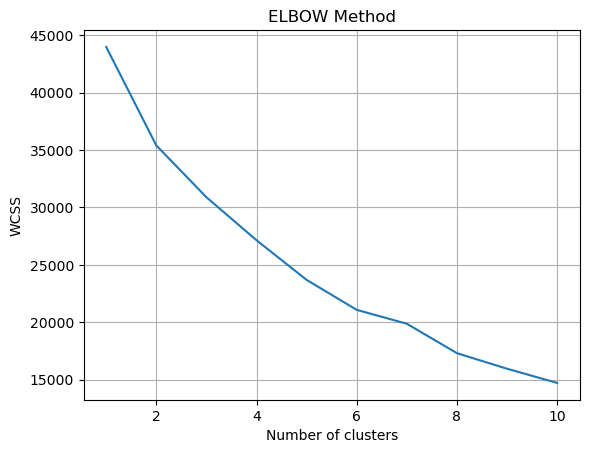

In [26]:
# Finding optimum number of cluster.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('ELBOW Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

- By ELBOW graph we can select optimum number of clusters using WCSS.
- Selected number of clusters = 5

In [27]:
# Building cluster algorithm
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(std_data)
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [28]:
# Creating new variable of data for k-means.
Airlines_Data_KM = Airlines_Data

In [29]:
# storing clusters in new variable.
Airlines_Data_KM['Clusters'] = kmeans.labels_
Airlines_Data_KM

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,1
3994,64385,0,1,1,1,981,5,0,0,1395,1,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1,0
3996,54899,0,1,1,1,500,1,500,1,1401,0,1


In [30]:
# Unique clusters.
Airlines_Data_KM['Clusters'].unique()

array([1, 0, 4, 2, 3])

In [31]:
# Total number of Passengers present in each cluster.
Airlines_Data_KM['Clusters'].value_counts()

1    2505
0    1270
2     165
4      43
3      15
Name: Clusters, dtype: int64

In [32]:
# Calculating mean of each cluster for each columnn.
Airlines_Data_KM.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,116739.909449,155.122047,3.704724,1.000000,1.001575,39234.801575,18.740945,334.584252,0.997638,4896.661417,0.648031
1,1,43869.946906,98.914970,1.225150,1.000000,1.000399,4603.542116,6.809980,196.544910,0.611178,3687.407984,0.200000
2,2,188752.684848,783.909091,2.181818,1.000000,1.000000,31282.351515,26.430303,5392.987879,15.612121,4684.442424,0.800000
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


### 3) DBSCAN Clustering

In [33]:
# neccessory libraries
from sklearn.cluster import  DBSCAN

In [34]:
# fit algorithm.
dbscan = DBSCAN(eps=3, min_samples=8)
dbscan.fit(std_data)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# Creating new variable of data for k-means.
Airlines_Data_DB = Airlines_Data

In [36]:
# storing clusters in new variable.
Airlines_Data_DB['Clusters'] = dbscan.labels_
Airlines_Data_DB

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,0
3994,64385,0,1,1,1,981,5,0,0,1395,1,0
3995,73597,0,3,1,1,25447,8,0,0,1402,1,0
3996,54899,0,1,1,1,500,1,500,1,1401,0,0


In [37]:
# Unique clusters.
Airlines_Data_DB['Clusters'].unique()

array([ 0, -1,  1,  2], dtype=int64)

In [38]:
# Total number of Passengers present in each cluster.
Airlines_Data_DB['Clusters'].value_counts()

 0    3885
-1      75
 2      25
 1      13
Name: Clusters, dtype: int64

- Total number of noise present in dataset = 75

In [39]:
# Calculating mean of each cluster for each columnn.
Airlines_Data_DB.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,315876.333333,1699.173333,3.080000,1.093333,1.653333,71315.106667,30.093333,4500.266667,12.386667,5140.253333,0.853333
1,0,69271.556757,115.540798,2.049678,1.000000,1.000000,16145.053797,11.212098,384.155212,1.166538,4102.107593,0.361647
2,1,41562.307692,0.000000,1.000000,3.000000,1.000000,16338.230769,16.076923,323.076923,0.923077,4133.384615,0.307692
3,2,39187.040000,0.000000,1.120000,2.000000,1.000000,11107.040000,14.840000,224.000000,0.800000,3703.240000,0.320000


## =======================================================================